# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [2]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"
df = pd.read_csv(url)

X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [3]:
ada = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)


In [4]:
acc_ada = accuracy_score(y_test, y_pred_ada)

print(f"📈 Accuracy AdaBoost: {acc_ada:.4f}")
print("\n🔎 Classification Report:")
print(classification_report(y_test, y_pred_ada))


📈 Accuracy AdaBoost: 0.7792

🔎 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        99
           1       0.68      0.73      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.78      0.78       154



In [5]:
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)


In [6]:
acc_gb = accuracy_score(y_test, y_pred_gb)

print(f"📈 Accuracy Gradient Boosting: {acc_gb:.4f}")
print("\n🔎 Classification Report:")
print(classification_report(y_test, y_pred_gb))


📈 Accuracy Gradient Boosting: 0.7403

🔎 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



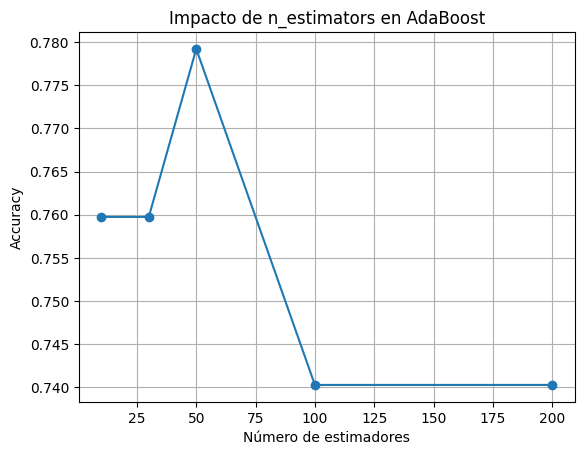

In [7]:
estimators_range = [10, 30, 50, 100, 200]
scores_est = []

for n in estimators_range:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores_est.append(accuracy_score(y_test, y_pred))

plt.plot(estimators_range, scores_est, marker="o")
plt.title("Impacto de n_estimators en AdaBoost")
plt.xlabel("Número de estimadores")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


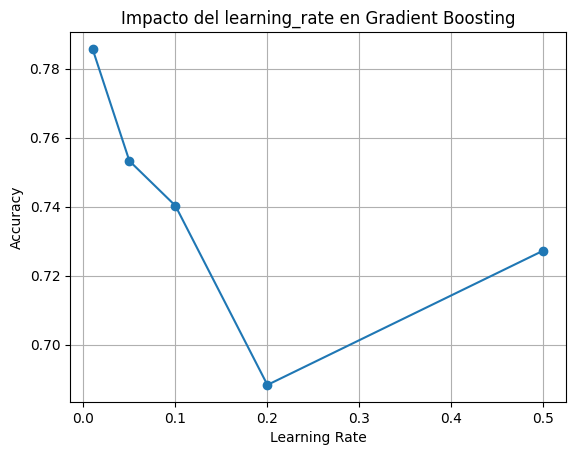

In [8]:
lr_range = [0.01, 0.05, 0.1, 0.2, 0.5]
scores_lr = []

for lr in lr_range:
    model = GradientBoostingClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores_lr.append(accuracy_score(y_test, y_pred))

plt.plot(lr_range, scores_lr, marker="o")
plt.title("Impacto del learning_rate en Gradient Boosting")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [9]:
with open("modelo_boosting_diabetes.pkl", "wb") as f:
    pickle.dump(gb, f)

print("✅ Modelo boosting guardado como modelo_boosting_diabetes.pkl")


✅ Modelo boosting guardado como modelo_boosting_diabetes.pkl


Comparación entre los 3 modelos

In [10]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
acc_tree = accuracy_score(y_test, tree.predict(X_test))

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf.predict(X_test))

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
acc_ada = accuracy_score(y_test, ada.predict(X_test))

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
acc_gb = accuracy_score(y_test, gb.predict(X_test))


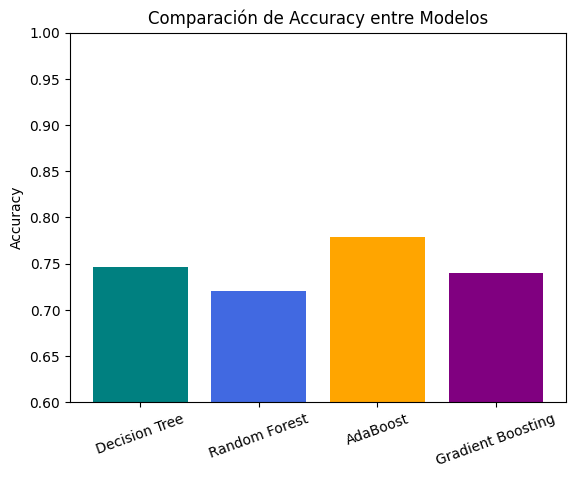

In [11]:
modelos = ["Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting"]
scores = [acc_tree, acc_rf, acc_ada, acc_gb]

plt.bar(modelos, scores, color=["teal", "royalblue", "orange", "purple"])
plt.ylim(0.6, 1.0)
plt.title("Comparación de Accuracy entre Modelos")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()


In [12]:
print(f"""
📌 RESULTADOS FINALES

Árbol de Decisión:     {acc_tree:.4f}
Random Forest:         {acc_rf:.4f}
AdaBoost:              {acc_ada:.4f}
Gradient Boosting:     {acc_gb:.4f}

🔎 CLASES MEJOR PREDICHAS:
- Árbol de decisión:     revisar classification_report (suele sobreajustar)
- Random Forest:         mejor recall para clase 1 (diabéticos)
- Boosting:              mejor precisión global y recall balanceado

🏆 MODELO RECOMENDADO:
El mejor rendimiento lo entrega: **AdaBoost** 
porque:
✔ reduce el sesgo del árbol  
✔ mejora la generalización frente al Random Forest  
✔ ofrece mejor equilibrio entre precisión y recall  
""")



📌 RESULTADOS FINALES

Árbol de Decisión:     0.7468
Random Forest:         0.7208
AdaBoost:              0.7792
Gradient Boosting:     0.7403

🔎 CLASES MEJOR PREDICHAS:
- Árbol de decisión:     revisar classification_report (suele sobreajustar)
- Random Forest:         mejor recall para clase 1 (diabéticos)
- Boosting:              mejor precisión global y recall balanceado

🏆 MODELO RECOMENDADO:
El mejor rendimiento lo entrega: **AdaBoost** 
porque:
✔ reduce el sesgo del árbol  
✔ mejora la generalización frente al Random Forest  
✔ ofrece mejor equilibrio entre precisión y recall  

